# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from sklearn.datasets import make_classification, make_regression

e
## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [44]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

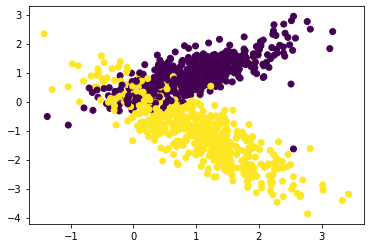

In [45]:

from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)


We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

<b>Exercise 2:</b>

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest. What can you conclude from this? from sklearn.

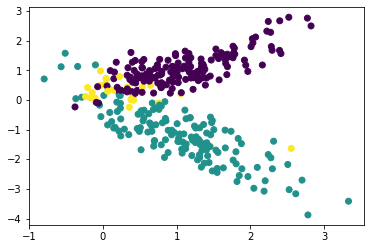

In [47]:
clf = RandomForestClassifier(max_depth=5, n_estimators=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
# print(X_test[:, 1])
new_y = []
for pred, real in zip(predictions, y_test):
    if pred == real:
        new_y.append(real)
    else:
        new_y.append(2)

plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=new_y)


## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 

In [48]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the 'contourf' function of matplotlib.

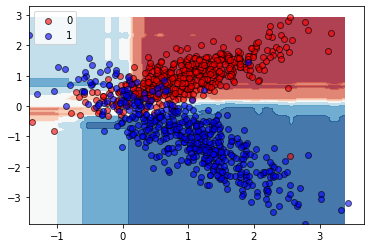

In [49]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

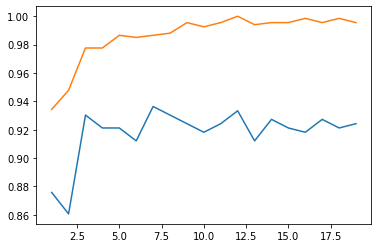

In [56]:
from sklearn.metrics import accuracy_score

test_scores = []
train_scores = []
ns = []

for n in range(1, 20):
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    test_predictions = clf.predict(X_test)
    train_predictions = clf.predict(X_train)
    ns.append(n)
    train_scores.append(accuracy_score(y_train, train_predictions))
    test_scores.append(accuracy_score(y_test, test_predictions))

plt.plot(ns, test_scores)
plt.plot(ns, train_scores)
plt.show()

#
# for pred, real in zip(predictions, y_test):
#     if pred == real:
#         new_y.append(real)
#     else:
#         new_y.append(2)


## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [51]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])

<b>Exercise 4:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [79]:
from scipy.stats import binned_statistic
intl_plan_dummy = pd.get_dummies(churn_df['International plan'])
# voice_plan_numeric = churn_df['Voice mail plan'].astype('category').cat.codes
# state = churn_df['State'].astype('category').cat.codes
churn_df = churn_df.drop(['State', 'International plan', 'Voice mail plan'], axis='columns')
binning_intl_calls = binned_statistic(churn_df['Total intl calls'], churn_df['Total intl calls'], bins=5)
# print(binning_intl_calls)


      Account length  Area code  Number vmail messages  Total day minutes  \
0                128        415                     25              265.1   
1                107        415                     26              161.6   
2                137        415                      0              243.4   
3                 84        408                      0              299.4   
4                 75        415                      0              166.7   
...              ...        ...                    ...                ...   
3328             192        415                     36              156.2   
3329              68        415                      0              231.1   
3330              28        510                      0              180.8   
3331             184        510                      0              213.8   
3332              74        415                     25              234.4   

      Total day calls  Total day charge  Total eve minutes  Total eve calls

<b>Exercise 5:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')
[0.04049551 0.01160072 0.03619027 0.15234537 0.03883769 0.15617108
 0.08370124 0.03804066 0.06724896 0.04692581 0.04852472 0.04136536
 0.04190678 0.03129442 0.04059332 0.12475808]


<AxesSubplot:>

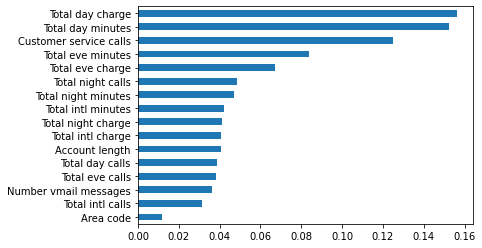

In [110]:
X_train, X_test, y_train, y_test = train_test_split(churn_df, label.astype('category').cat.codes, test_size=.33, random_state=42)

clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)
idx = churn_df.keys()
print(idx)
importance = clf.feature_importances_
print(importance)
new = pd.Series(importance, index=idx)
new.nsmallest(20).plot(kind='barh')



<b>Exercise 6:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [112]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
X_test, y_test = make_regression(n_samples=300, n_features=10)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=.33, random_state=42)

In [117]:
from sklearn.metrics import mean_squared_error
# this looks weird
clfr = RandomForestRegressor(n_estimators=20)
clfr.fit(X_train, y_train)
predictions = clfr.predict(X_test)
print(y_test)
print(predictions)
mean_squared_error(y_test, predictions)

[  73.31722735 -388.53336644 -242.11457647    9.58252749 -238.03557129
  120.79324384  368.77149936   50.09515848   85.42116309 -378.83667913
 -185.2335351  -679.41423712  209.66403668  291.63333436   77.12696642
 -274.63617183  -77.1751487   118.65664179  234.31535083 -333.11636998
  481.62588792 -268.4037047  -292.88779436  -66.60174125  476.76051534
   74.45059007 -125.43534115   58.74582842   50.95687248 -282.18835546
 -384.80319741   98.23867064 -449.95667715   59.4641299  -466.4423236
   75.17923776 -276.18932988  226.89379491 -118.50239045  241.73301938
 -122.25169357  306.73886573   33.15811538 -138.08281692   35.57169685
  538.96951322   12.86094019 -339.08868173  338.62012126   52.10499049
  264.89865376 -105.66066937 -321.70575112   42.80439007 -157.90746095
 -209.67533035   98.34141518  241.81605594 -166.22007079   79.45719154
 -140.83265246  242.75001771  189.22696246 -363.87669911   13.50662534
  174.633253     29.18672018  241.20135661   -5.35411048  200.50571733
  -77.7

23021.88879517719